In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

#VARIABLES
delta_time = 1
L=0.03
file_path = '../Out500-1000000-wallEvents-w-0.09-L-0.03.txt'

sns.set_style("darkgrid")


In [118]:
#TODO: calculate delta_time as avg time in which 500 events happpen

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

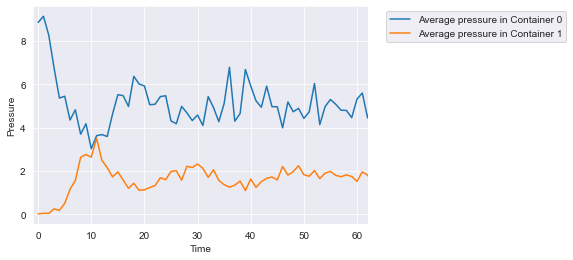

In [119]:

latest_timestamp = 0
#Parse the .txt file
data = []  # Store the parsed data as (timestamp, velocity, container_id) tuples
with open(file_path, 'r') as file:
    lines = file.readlines()
    i = 0
    j = 0

    while i < len(lines):
        #print(lines[i])
        if j == 0 :
          readTimestamp = float(lines[i].strip())
          latest_timestamp = readTimestamp
          j = 1
        elif j == 1 :
          parts = lines[i].split()
          readVelocity = float(parts[0])
          readContainer_id = int(parts[1]) - 1
          data.append((readTimestamp, readVelocity, readContainer_id))
          j = 0

        i += 1


#Group data by container ID
container_data = {}
for timestamp, velocity, container_id in data:
    if container_id not in container_data:
        container_data[container_id] = []
    container_data[container_id].append((timestamp, velocity))

time_arrays = {}
steps = []
#Build time series
for container_id, container_values in container_data.items():
    timestamps, velocities = zip(*container_values)
    num_steps = int(latest_timestamp / delta_time)

    time_series = [(0.0) for i in range(num_steps)] #(i*delta_time, 0.0)
    steps = [(i*delta_time) for i in range(num_steps)] #build array with all time steps

    vertical_sides = 0
    if container_id == 1:
        vertical_sides = 0.09 + (0.09 - L)
    elif container_id == 2:
        vertical_sides = L

    index = int(timestamps[0] / delta_time)
    buffer = 0

    for timestamp, velocity in zip(timestamps, velocities):
        new_index = int(timestamp / delta_time)
        if index != new_index:
            sum_impulse = buffer  #sum velocities
            avg_p = sum_impulse /(delta_time*(2*0.09 + vertical_sides)) #average pressure
            #time_series[index] = buffer / number #average pressure
            time_series[index] = (avg_p)
            index = new_index
            buffer = 0

        buffer = buffer + velocity

    #print("time series ", container_id, time_series)
    time_arrays[container_id] = time_series

plt.tight_layout()
print(steps)
print("CONTAINER ", 0, time_arrays[0])
plt.plot(steps[:len(time_arrays[0])], time_arrays[0], label=f'Average pressure in Container {0}')

print("CONTAINER ", 1, time_arrays[1])
plt.plot(steps[:len(time_arrays[1])], time_arrays[1], label=f'Average pressure in Container {1}')

plt.xlim((-1, 62))

plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
fname = "pressure-500-1000000-w-0.09-L-0.03-dt-" + str(delta_time) + ".png"
plt.savefig(fname, bbox_inches='tight', dpi=300)
plt.show()
